# Telecom Customer Churn - Konstantinos

Customer churn occurs when customers or subscribers stop doing business with a company or service, also known as customer attrition. It is also referred to as loss of clients or customers. One particular industry in which churn rates are particularly useful is the telecommunications industry, simply because most customers have multiple options from which to choose within a geographic location.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_columns = 100

Import useful tools for my dataset

In [5]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv") 

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
print ("\nMissing values :\n",df.isnull().sum())


Missing values :
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Some descriptives

In [9]:
# unique customers
df["customerID"].nunique()

7043

In [10]:
%matplotlib inline

In [11]:
def create_bars(column, *args, **kwargs):
    plt.figure()
    df.groupby(column)[column].count().plot.bar(rot=0, title=column, *args, **kwargs)
    plt.show()

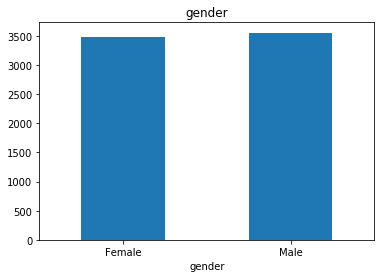

In [12]:
create_bars("gender")

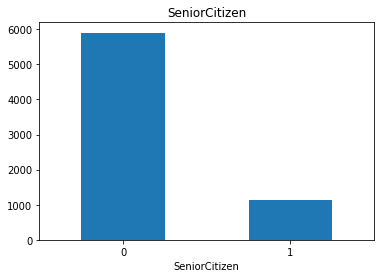

In [13]:
create_bars("SeniorCitizen")

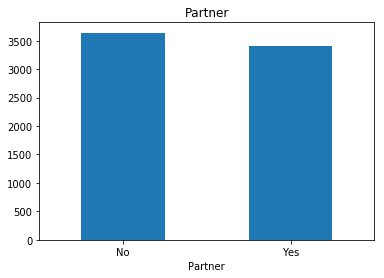

In [14]:
create_bars("Partner")

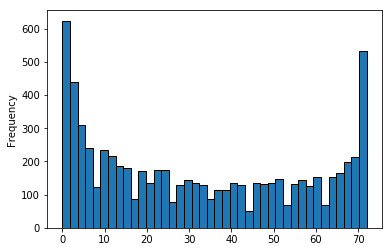

In [15]:
df["tenure"].plot.hist(bins=40, edgecolor="k")

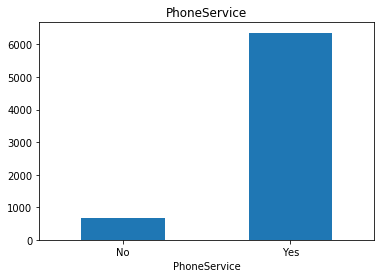

In [16]:
create_bars("PhoneService")

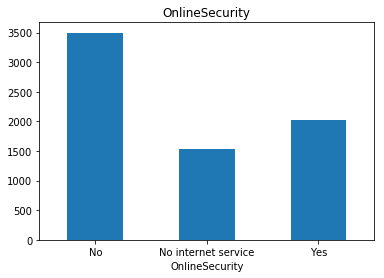

In [17]:
create_bars("OnlineSecurity")

As I mentioned in my Project Report #1 I will replace "No internet service" with "No" in the following columns:

In [18]:
replace_no1 = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_no1 : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

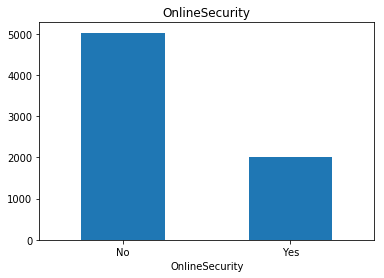

In [19]:
create_bars("OnlineSecurity")

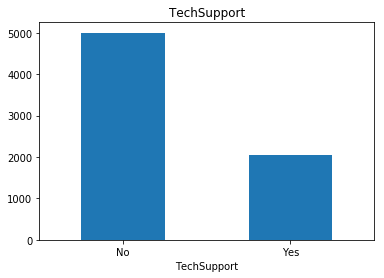

In [20]:
create_bars("TechSupport")

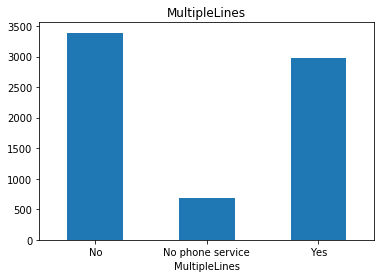

In [21]:
create_bars("MultipleLines")

Replace "No phone service" to "No" in column MultipleLines

In [22]:
replace_no2 = ['MultipleLines']
for i in replace_no2 : 
    df[i]  = df[i].replace({'No phone service' : 'No'})

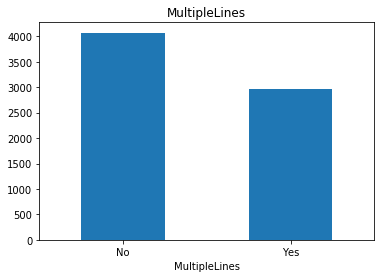

In [23]:
create_bars("MultipleLines")

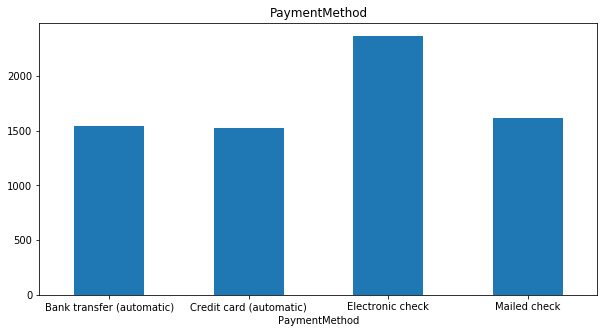

In [24]:
create_bars("PaymentMethod", figsize=(10, 5))

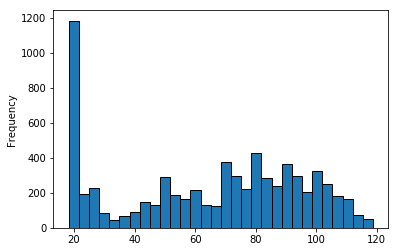

In [25]:
df["MonthlyCharges"].plot.hist(bins=30, edgecolor="k")

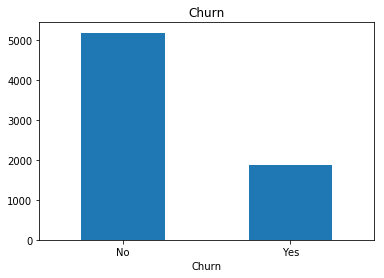

In [26]:
create_bars("Churn")

# Correlations to churn

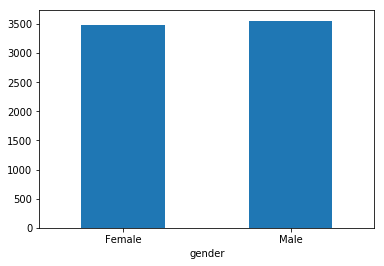

In [19]:
# men and women churn equally
df.groupby("gender")["Churn"].count().plot.bar(rot=0)

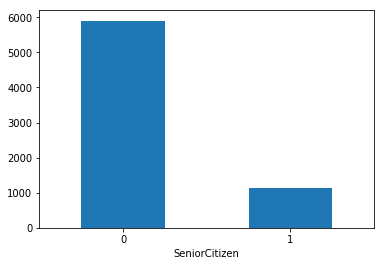

In [20]:
# Seniors churn much less
df.groupby("SeniorCitizen")["Churn"].count().plot.bar(rot=0)

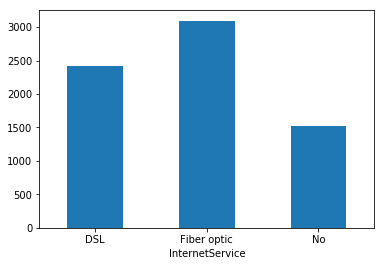

In [21]:
# Those with fiber optic churn more
df.groupby("InternetService")["Churn"].count().plot.bar(rot=0)

In [1]:
# Those with no internet security tend more
df.groupby("OnlineSecurity")["Churn"].count().plot.bar(rot=0)

NameError: name 'df' is not defined

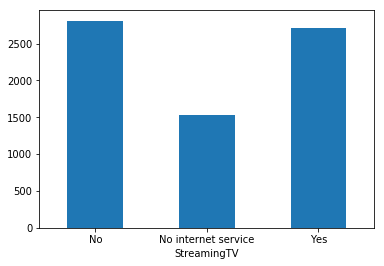

In [23]:
df.groupby("StreamingTV")["Churn"].count().plot.bar(rot=0)

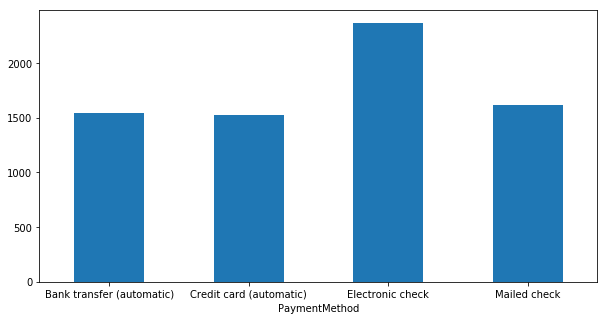

In [24]:
# those paying with e-check shurn more
df.groupby("PaymentMethod")["Churn"].count().plot.bar(rot=0, figsize=(10, 5))

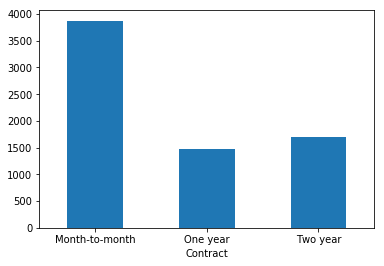

In [25]:
# Those who pay month-to-month churn more
df.groupby("Contract")["Churn"].count().plot.bar(rot=0)

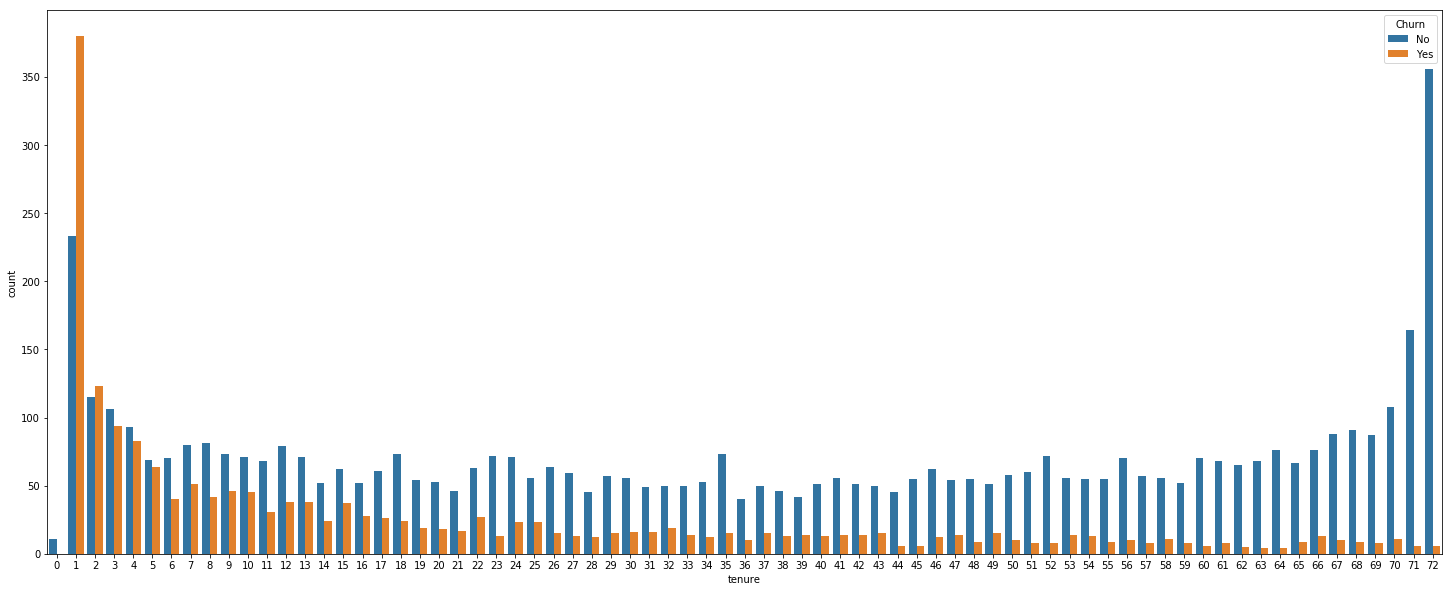

In [82]:
#customers that have been in this company for longer periods are less likely to leave
plt.figure(figsize = (25,10))
sns.countplot(df['tenure'], hue = df.Churn)

# Data cleaning
Fix data types, categorical to numeric

In [26]:
df2 = df.copy()

In [27]:
df2 = df2.drop(columns=["customerID"])  # drop since each customerID appears only once

In [28]:
df2 = df2[df2["TotalCharges"] != " "]

In [29]:
df2["TotalCharges"] = df2["TotalCharges"].apply(float)

In [30]:
binary_features = [c for c in df2.columns if df2[c].nunique() == 2]
multi_features = [c for c in df2.columns if 2 < df2[c].nunique() < 6]

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
for c in binary_features :
    df2[c] = le.fit_transform(df2[c])

In [33]:
# convert multi-categorical (more than 2 categories to on-hot encoded vectors)
df2 = pd.get_dummies(data=df2, columns=multi_features)

In [34]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [35]:
# columns with features
feature_names = df2.columns.tolist()
feature_names = [f for f in feature_names if f != "Churn"]

In [36]:
# correlations among features
corr = df2.corr()

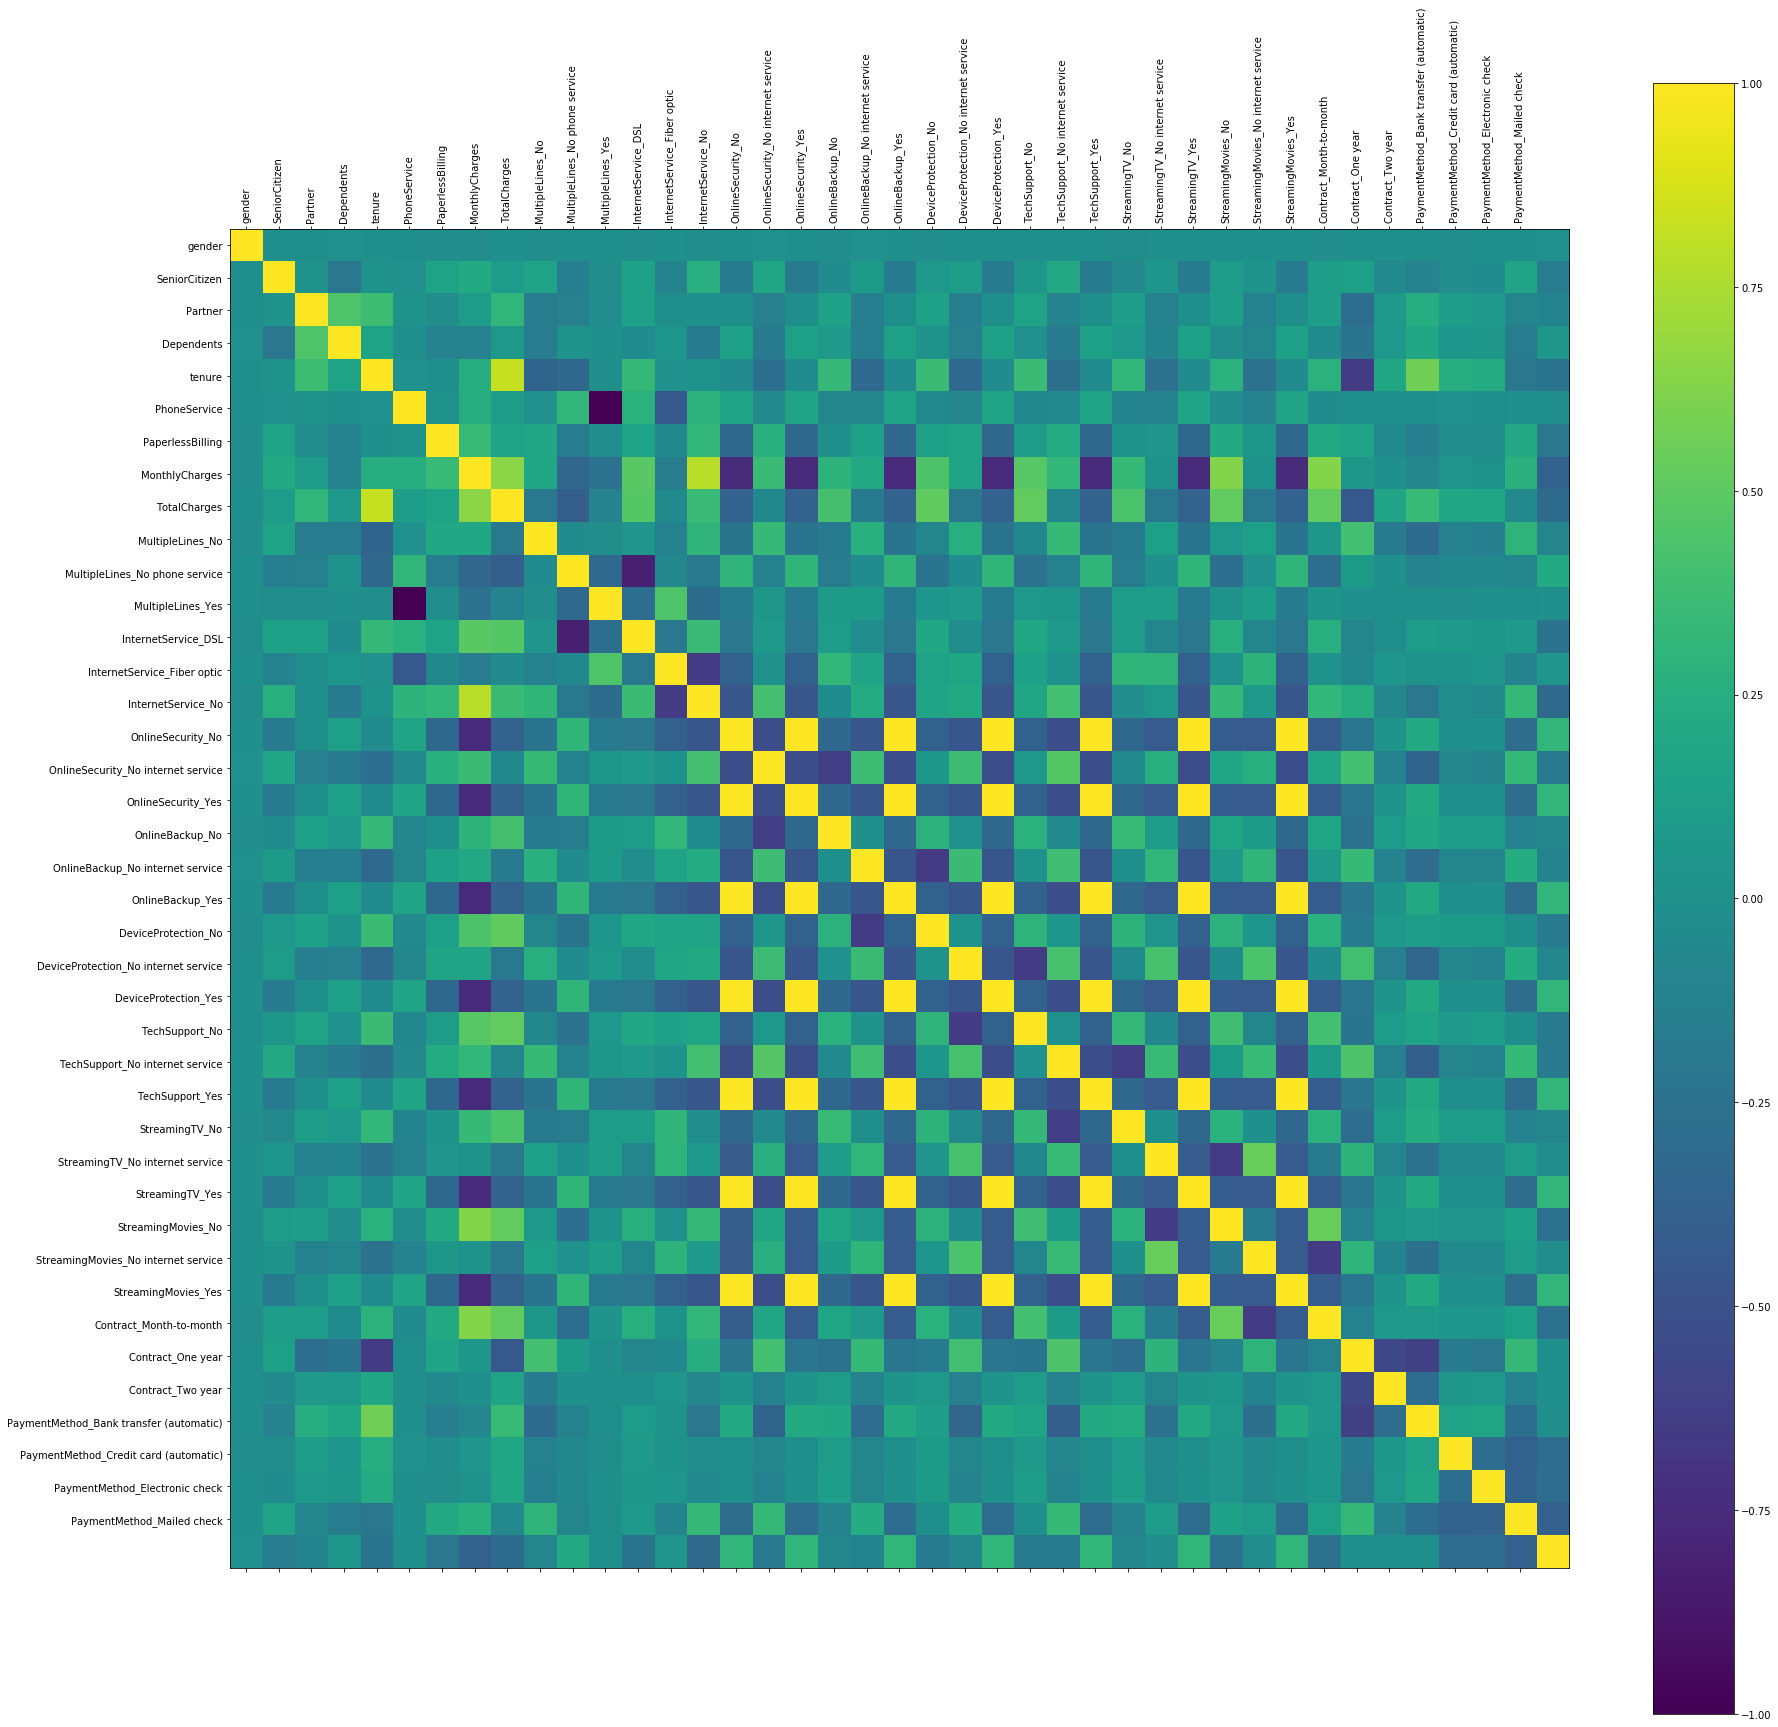

In [37]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111)
cax = ax.matshow(corr)
fig.colorbar(cax)

plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.yticks(range(len(feature_names)), feature_names, rotation=0)

plt.show()

# Let's predict

In [38]:
X = df2[feature_names].values
y = df2["Churn"].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# scale data to be Gaussian-like
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf = RandomForestClassifier(n_estimators=100)

In [45]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
y_pred = clf.predict(scaler.transform(X_test))

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
confusion_matrix(y_test, y_pred)

array([[1363,  186],
       [ 288,  273]])

In [49]:
accuracy_score(y_test, y_pred)

0.7753554502369668

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(scaler.transform(X_test))

/miniconda3/envs/em212/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
confusion_matrix(y_test, y_pred)

array([[1376,  173],
       [ 261,  300]])

In [53]:
accuracy_score(y_test, y_pred)

0.7943127962085308

# Feature Importance
Using the feature importance that the random forest classifier produces to rank features according to how important they are for a custom to churn  
Most important features are:
- Total charges and monthly charges (which is logical: the amount of money is a main factor for customers)
- tenure
- contract month to month
- No online security: it seems that having or not onslne security is an inidcator of whether a customer will churn

In [54]:
imp_ind = clf.feature_importances_.argsort()[::-1]  # sort in descending order
np.take(feature_names, imp_ind)

array(['TotalCharges', 'MonthlyCharges', 'tenure',
       'Contract_Month-to-month', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'gender', 'PaperlessBilling',
       'PaymentMethod_Electronic check', 'Partner', 'TechSupport_No',
       'SeniorCitizen', 'Dependents', 'Contract_Two year',
       'OnlineBackup_No', 'DeviceProtection_No', 'MultipleLines_Yes',
       'MultipleLines_No', 'PaymentMethod_Credit card (automatic)',
       'OnlineBackup_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'StreamingTV_Yes', 'TechSupport_Yes', 'DeviceProtection_Yes',
       'StreamingMovies_Yes', 'StreamingMovies_No',
       'PaymentMethod_Mailed check', 'StreamingTV_No',
       'Contract_One year', 'InternetService_DSL', 'OnlineSecurity_Yes',
       'StreamingTV_No internet service',
       'MultipleLines_No phone service', 'PhoneService',
       'TechSupport_No internet service',
       'StreamingMovies_No internet service',
       'OnlineSecurity_No internet service',
       '

# Merging with External data

Using Consumer Expenditures Survey information from the Bureau of Labor Statistics https://www.bls.gov/cex/tables.htm about 2017 aggregate expenditure share 

In [66]:
conda install xlrd 

Solving environment: done

## Package Plan ##

  environment location: /miniconda3/envs/em212

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    intel-openmp-2019.3        |              199         1.1 MB
    mkl-2019.3                 |              199       154.7 MB
    numpy-1.16.3               |   py37hacdab7b_0          49 KB
    numpy-base-1.16.3          |   py37h6575580_0         4.2 MB
    xlrd-1.2.0                 |           py37_0         186 KB
    ------------------------------------------------------------
                                           Total:       160.3 MB

The following NEW packages will be INSTALLED:

  intel-openmp       pkgs/main/osx-64::intel-openmp-2019.3-199
  mkl                pkgs/main/osx-64::mkl-2019.3-199
  mkl_fft            pkgs/main/osx-64::mkl_fft-1.0.10-py37h5e564d8_0
  mkl_random         pkgs/main/osx

I only care about Telephone and Cellular phone services

In [67]:
df_ext = pd.read_excel("./age.xlsx", skiprows=2)

tel_i = np.where(df_ext["Item"].values == "Telephone services")[0][0]  # row with tel. services
cel_i = np.where(df_ext["Item"].values == "Cellular phone service")[0][0]  # row with cell. services
df_ext = df_ext.iloc[[tel_i + 1, cel_i + 1]].reset_index(drop=True)  # keep only these rows (mean values)
df_ext.loc[0, "Item"] = "Telephone services"  # rename items name
df_ext.loc[1, "Item"] = "Cellular phone service"
df_ext = df_ext.transpose().reset_index()  # pivot to convert it to columnar data
df_ext.columns = df_ext.iloc[0].values  # rename columns
df_ext = df_ext.drop([0, 1]).reset_index(drop=True)  # drop all consumer units row
df_ext["Item"] = df_ext["Item"].apply(lambda x: x.replace("\n", " "))  # clean string values
df_ext

,Item,Telephone services,Cellular phone service
0,Under 25 years,771,725
1,25-34 years,1227,1139
2,35-44 years,1601,1439
3,45-54 years,1725,1492
4,55-64 years,1459,1161
5,65 years and older,1063,672
6,65-74 years,1209,850
7,75 years and older,857,423


SeniorCitizen >= 65 years

In [86]:
junior_tel = df_ext["Telephone services"].iloc[0:5].mean()
junior_cel = df_ext["Cellular phone service"].iloc[0:5].mean()

senior_tel = df_ext["Telephone services"].iloc[5:8].mean()
senior_cel = df_ext["Cellular phone service"].iloc[5:8].mean()

I can make the assumption that the customers of this telecom company belong to this group

In [69]:
df["Telephone services"] = df["SeniorCitizen"].apply(lambda x: senior_tel if x == 1 else junior_tel)
df["Cellular phone service"] = df["SeniorCitizen"].apply(lambda x: senior_cel if x == 1 else junior_cel)

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Telephone services,Cellular phone service
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1356.6,1191.2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1356.6,1191.2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1356.6,1191.2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1356.6,1191.2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1356.6,1191.2


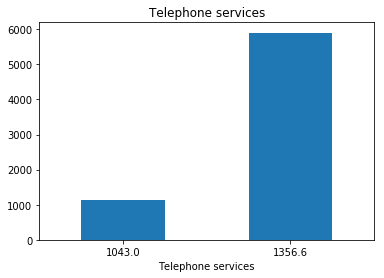

In [71]:
create_bars("Telephone services")

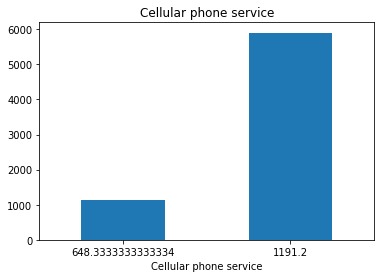

In [72]:
create_bars("Cellular phone service")

# Younger people spend more money but they are more likely to churn

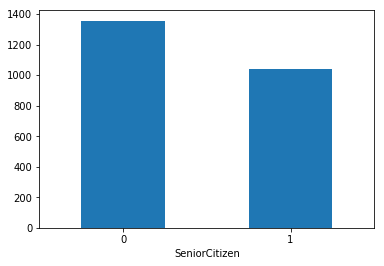

In [78]:
df.groupby("SeniorCitizen")["Telephone services"].mean().plot.bar(rot=0)

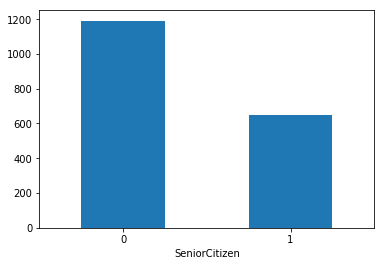

In [79]:
df.groupby("SeniorCitizen")["Cellular phone service"].mean().plot.bar(rot=0)

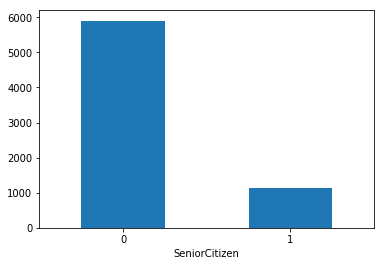

In [76]:
# younger customers churn more
df.groupby("SeniorCitizen")["Churn"].count().plot.bar(rot=0)

Therefore, this company should provide younger people with incentives to maintain them as customers. They will spend the money anyway. Moreover, Total and Monthly charges are the most important feature, so if they persuade this group of customers to stay, they will spend more money and therefore become loyal customers. 

# Their Preferences? 

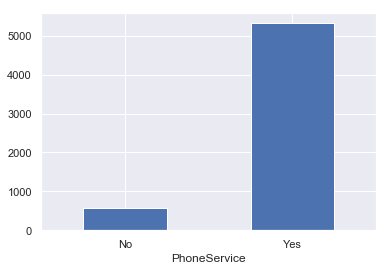

In [106]:
# Almost all of them use phone service
df[df["SeniorCitizen"]==0].groupby("PhoneService")["PhoneService"].count().plot.bar(rot=0)

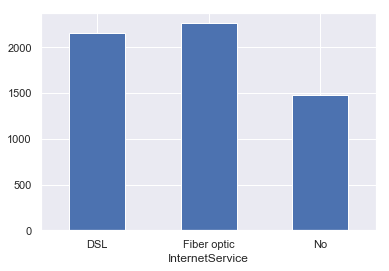

In [105]:
# they prefer fiber optic service
df[df["SeniorCitizen"]==0].groupby("InternetService")["InternetService"].count().plot.bar(rot=0)

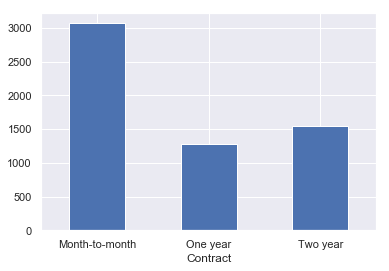

In [107]:
# They tend to have short term contracts
df[df["SeniorCitizen"]==0].groupby("Contract")["Contract"].count().plot.bar(rot=0)

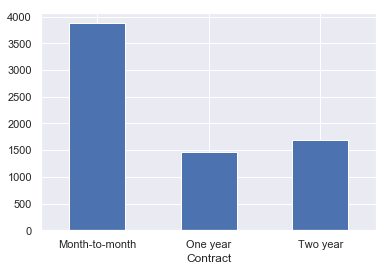

In [108]:
# But we already know that customers with month-to-month contract churn more
df.groupby("Contract")["Churn"].count().plot.bar(rot=0)

# One solution

We already know that customers with month to month contracts are more likely to leave. This group of customers use phone service and prefer fiber optic service for their Internet connection. As a result, a discounted 1 year contract for phone service with fiber optic internet service is one of the most attractive solutions.